# PIE Air France: Robustesse chaînage avion

# Mise en forme des données

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import isnan

vols=pandas.read_csv("./Extract_1cut.csv",sep=',',decimal=b',')
vols['Date départ prévue TU'] = vols['Date départ prévue TU'].apply(lambda x: x[:10])
vols['Date départ réalisée TU'] = vols['Date départ réalisée TU'].apply(lambda x: x[:10])
vols['Date arrivée prévue TU'] = vols['Date arrivée prévue TU'].apply(lambda x: x[:10])
vols['Date arrivée réalisée TU'] = vols['Date arrivée réalisée TU'].apply(lambda x: x[:10])

In [2]:
#Création de la date départ prévue DDP
dateetheure=vols['Date départ prévue TU']+vols['Heure départ prévue TU']
vols = vols.assign(DDP=pandas.to_datetime(dateetheure,format='%Y/%m/%d%H:%M'))

#Création de la date départ réalisée DDR
dateetheure=vols['Date départ réalisée TU']+vols['Heure départ réalisée TU']
vols = vols.assign(DDR=pandas.to_datetime(dateetheure,format='%Y/%m/%d%H:%M'))

#Création de la date arrivée prévue DAP
dateetheure=vols['Date arrivée prévue TU']+vols['Heure arrivée prévue TU']
vols = vols.assign(DAP=pandas.to_datetime(dateetheure,format='%Y/%m/%d%H:%M'))

#Création de la date départ prévue DAR
dateetheure=vols['Date arrivée réalisée TU']+vols['Heure arrivée réalisée TU']
vols = vols.assign(DAR=pandas.to_datetime(dateetheure,format='%Y/%m/%d%H:%M'))

In [3]:
#Calcul de retard au départ en minutes : Retard_D
Duree = vols.DDR - vols.DDP
vols = vols.assign(Retard_D = Duree.apply(lambda x: x.total_seconds()/60))

#Calcul de retard à l'arrivée en minutes : Retard_A
Duree = vols.DAR - vols.DAP
vols = vols.assign(Retard_A = Duree.apply(lambda x: x.total_seconds()/60))

In [4]:
#Filtrage sur les vols Air France et les avions moyen courrier : A320 family

vols_MC = vols[vols['Type exploitation']=='Air France']
vols_MC = vols_MC[vols_MC['Type avion réalisé'].apply(lambda x: (x=='318' or x=='319' or x=='320' or x=='321'))]

In [5]:
#week days

#jour de départ prévu
dateetheure=vols_MC['Date départ prévue TU']+vols['Heure départ prévue TU']

#conversion en format date time
dateetheure_datetime = pandas.to_datetime(dateetheure,format='%Y/%m/%d%H:%M')

#jour de la semaine
week_day = dateetheure_datetime.dt.day_name()
day = dateetheure_datetime.dt.dayofweek
#Creation de la colonne Week day
vols_MC = vols_MC.assign(Week_day= week_day)
vols_MC = vols_MC.assign(day_index= day)


vols_MC

,Unnamed: 0,Identifiant vol,TTM HUB,Type avion réalisé,Code retard,Temps de vol bloc bloc prévu,Temps de vol bloc bloc réalisé,Immatriculation,Type exploitation,Escale départ réalisée,...,Heure arrivée réalisée TU,Heure arrivée prévue TU,DDP,DDR,DAP,DAR,Retard_D,Retard_A,Week_day,day_index
5,132675,AF 1063 2009/07/01,NaN,321,35.0,160,148,FGTAI,Air France,ARN,...,20:15,20:05,2009-07-01 17:25:00,2009-07-01 17:47:00,2009-07-01 20:05:00,2009-07-01 20:15:00,22.0,10.0,Wednesday,2.0
10,48862,AF 1126 2009/07/01,50.0,320,NaN,100,92,FGKXR,Air France,CDG,...,06:54,07:00,2009-07-01 05:20:00,2009-07-01 05:22:00,2009-07-01 07:00:00,2009-07-01 06:54:00,2.0,-6.0,Wednesday,2.0
12,250720,AF 6142 2009/07/01,40.0,320,NaN,70,68,FGKXG,Air France,ORY,...,18:28,18:30,2009-07-01 17:20:00,2009-07-01 17:20:00,2009-07-01 18:30:00,2009-07-01 18:28:00,0.0,-2.0,Wednesday,2.0
13,244150,AF 1780 2009/07/01,45.0,319,19.0,75,79,FGRXA,Air France,CDG,...,17:25,17:15,2009-07-01 16:00:00,2009-07-01 16:06:00,2009-07-01 17:15:00,2009-07-01 17:25:00,6.0,10.0,Wednesday,2.0
15,20302,AF 1981 2009/07/01,NaN,321,87.0,80,64,FGTAU,Air France,LHR,...,07:00,07:00,2009-07-01 05:40:00,2009-07-01 05:56:00,2009-07-01 07:00:00,2009-07-01 07:00:00,16.0,0.0,Wednesday,2.0
19,207462,AF 0587 2009/07/01,NaN,320,NaN,300,284,FGKXP,Air France,AMM,...,03:28,03:45,2009-07-01 22:45:00,2009-07-01 22:44:00,2009-07-02 03:45:00,2009-07-02 03:28:00,-1.0,-17.0,Wednesday,2.0
20,138337,AF 2178 2009/07/01,50.0,321,55.0,135,126,FGTAD,Air France,CDG,...,10:00,09:50,2009-07-01 07:35:00,2009-07-01 07:54:00,2009-07-01 09:50:00,2009-07-01 10:00:00,19.0,10.0,Wednesday,2.0
22,40221,AF 1790 2009/07/01,50.0,320,15.0,200,216,FGKXM,Air France,CDG,...,14:25,13:55,2009-07-01 10:35:00,2009-07-01 10:49:00,2009-07-01 13:55:00,2009-07-01 14:25:00,14.0,30.0,Wednesday,2.0
23,245518,AF 3487 2009/07/01,NaN,318,NaN,90,94,FGUGA,Air France,AMS,...,12:15,12:15,2009-07-01 10:45:00,2009-07-01 10:41:00,2009-07-01 12:15:00,2009-07-01 12:15:00,-4.0,0.0,Wednesday,2.0
24,153444,AF 1251 2009/07/01,NaN,320,83.0,120,115,FGFKK,Air France,CPH,...,07:10,07:05,2009-07-01 05:05:00,2009-07-01 05:15:00,2009-07-01 07:05:00,2009-07-01 07:10:00,10.0,5.0,Wednesday,2.0


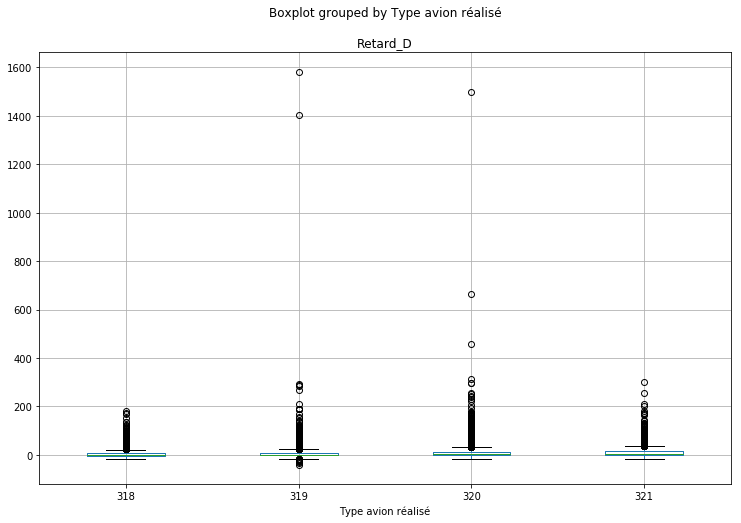

In [6]:
#Affichons le retard par type d'avions
vols_MC.boxplot('Retard_D', by='Type avion réalisé', figsize=(12, 8))
plt.show()

#### Commentaire

On constante ici beaucoup de valeurs que l'on peu considérer comme abérantes. Ces données seront donc retirées pour la suite de l'étude

In [7]:
#moyenne des retards à l'arrivée 
moy_retard = np.mean(vols_MC['Retard_D'])
#ecart type à l'arrivée
ecarttype_retard = np.std(vols_MC['Retard_D'])

#vols sans valeurs aberrantes
vols_MC_opt = vols_MC[vols_MC['Retard_D'].apply(lambda x: (x < moy_retard + 20*ecarttype_retard))]

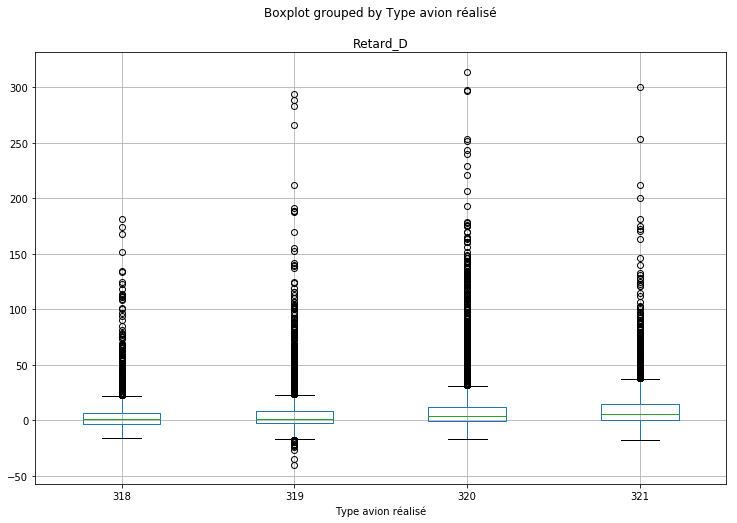

In [8]:
#boxplot du retard / type d'avion (retard non moyen)
vols_MC_opt.boxplot('Retard_D', by='Type avion réalisé', figsize=(12, 8))
plt.show()

#### Commentaire
On constate ici que les valeurs abérantes ont été supprimées. Pour le moment nous gardons les valeurs allant jusqu'à 20 fois l'écart type mais cette valeurs est à rediscuter.

# Analyse des données

<Figure size 432x288 with 0 Axes>

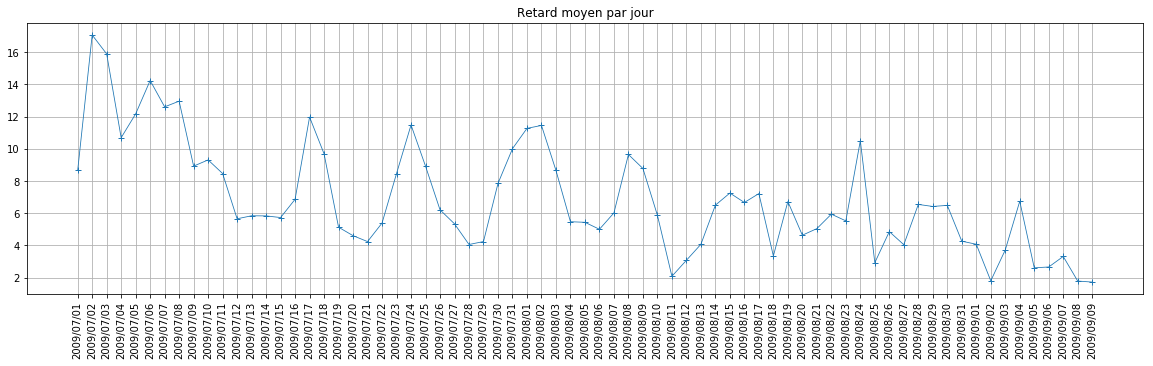

In [9]:
# Courbe retard moyen par jour
fig = plt.figure()

plt.subplots(figsize=(20, 5))
plt.plot(vols_MC.groupby(['Date départ réalisée TU'])[['Retard_D']].mean(),linewidth=0.8, marker="+")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.title("Retard moyen par jour")
plt.show()


#### Commentaire

On constate une forte saisonnalité dans le retard: juillet et début août il y a beaucoup de retard, moins en fin d'été.
Beaucoup de retard les week-ends et moins dans la semaine. Raisons ?
    - Plus il y a de vols prévus, plus les aéroports sont congestionnées et plus il y a de retards
    - Durant les vacances et les weekend les avions sont plus remplis ce qui entraîne un load factor plus important. Les avions prennent alors plus de retard

<Figure size 432x288 with 0 Axes>

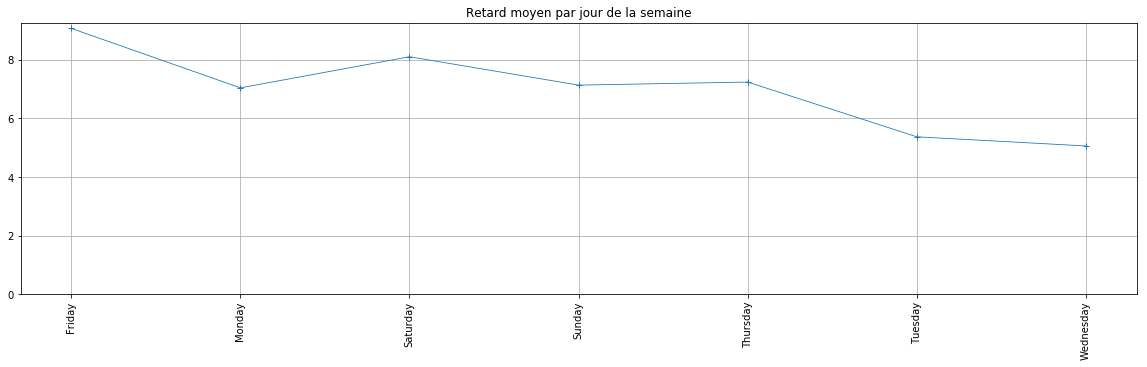

In [10]:
fig = plt.figure()
plt.subplots(figsize=(20, 5))
plt.plot(vols_MC.groupby(['Week_day'])[['Retard_D']].mean(),linewidth=0.8, marker="+")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.ylim(bottom=0)
plt.title("Retard moyen par jour de la semaine")
plt.show()

#### Commentaire
- Nouvelle confirmation qu'il y a plus de retards le weekend (vendredi et samedi surtout)

<Figure size 432x288 with 0 Axes>

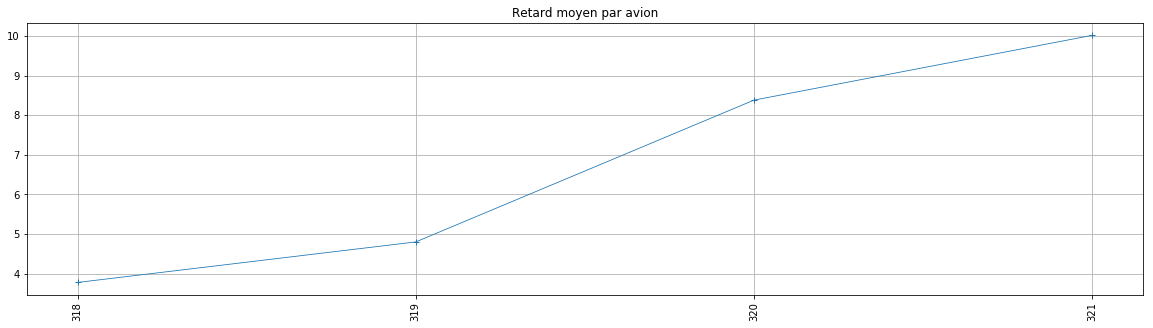

In [11]:
# Courbe retard moyen par avion
fig = plt.figure()

plt.subplots(figsize=(20, 5))
plt.plot(vols_MC.groupby(['Type avion réalisé'])[['Retard_D']].mean(),linewidth=0.8, marker="+")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.title("Retard moyen par avion")
plt.show()

#### Commentaire 

On constate ici que plus l'avion est gros et plus les retards sont importants. Cela peut-être du au fait qu'à load factor équivalent l'effet sur le retard est plus important sur un gros avion.

<Figure size 432x288 with 0 Axes>

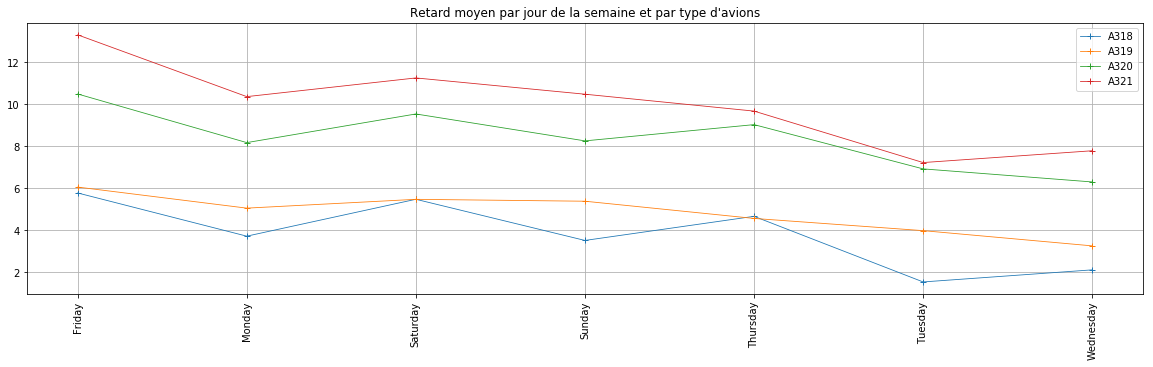

In [12]:
fig = plt.figure()

plt.subplots(figsize=(20, 5))
plt.plot(vols_MC.groupby(['Week_day','Type avion réalisé'])[['Retard_D']].mean().unstack('Type avion réalisé'),linewidth=0.8, marker="+")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.legend(('A318','A319','A320','A321'))
plt.title("Retard moyen par jour de la semaine et par type d'avions")
plt.show()

#### Commentaire

Résumé des deux courbes précédentes sur une seule courbe. A voir laquelle est la plus pertinente...

<Figure size 432x288 with 0 Axes>

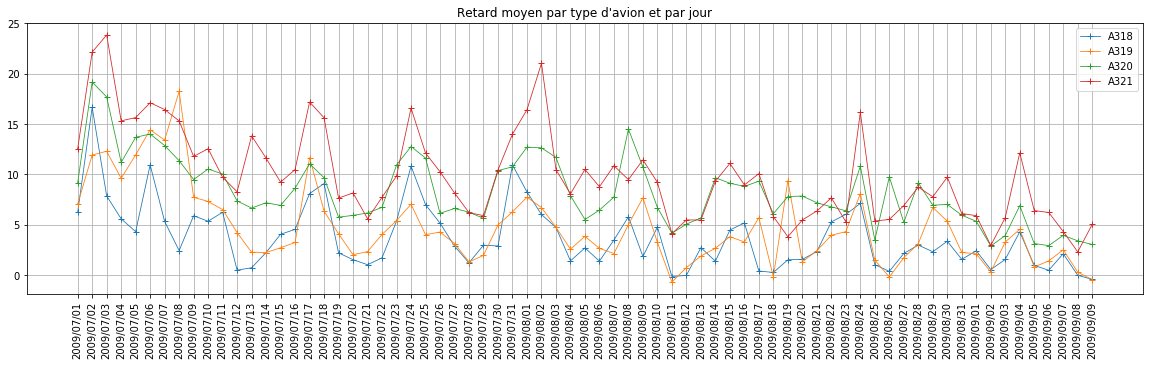

In [13]:
# Courbe retard moyen par jour par type d'avion

fig = plt.figure()

plt.subplots(figsize=(20, 5))
plt.plot(vols_MC.groupby(['Date départ réalisée TU','Type avion réalisé'])[['Retard_D']].mean().unstack('Type avion réalisé'),linewidth=0.8, marker="+")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.legend(('A318','A319','A320','A321'))
plt.title('Retard moyen par type d\'avion et par jour')
plt.show()

#### Commentaire

Globalement plus l'avion est gros et plus l'effet weekend semble important. 
Idée en première approche: 
    - Le weekend les load factors seraient plus importants et un load factor important sur un gros avion entraîne plus de retard qu'un load factor équivalent sur un petit avion

<Figure size 432x288 with 0 Axes>

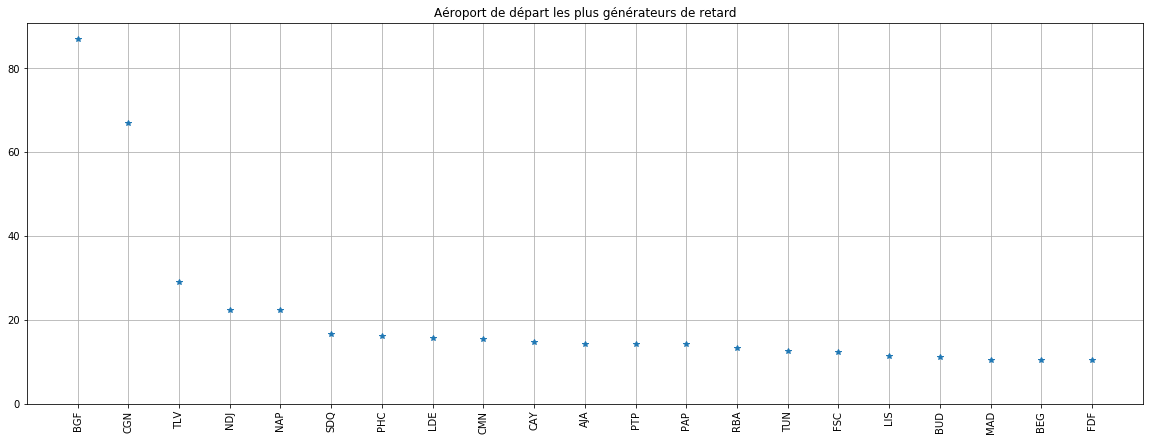

In [14]:
#Les aéroports ayant les plus de retard moyen
Escale_D = vols_MC.groupby('Escale départ réalisée')[['Retard_D']]
Escale_D_moy = Escale_D.mean()
Escale_D_max  = Escale_D_moy[Escale_D_moy['Retard_D']>10].sort_values(by=['Retard_D'],ascending=False)

fig = plt.figure()
plt.subplots(figsize=(20, 7))
plt.plot(Escale_D_max,"*")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.ylim(bottom=0)
plt.title("Aéroport de départ les plus générateurs de retard")
plt.show()

#### Commentaire

Classement des aéroports générateurs de retards. 
- Idée: pour un chaînage plus robuste, ne pas enchaîner les aéroports générateurs de retard.

<Figure size 432x288 with 0 Axes>

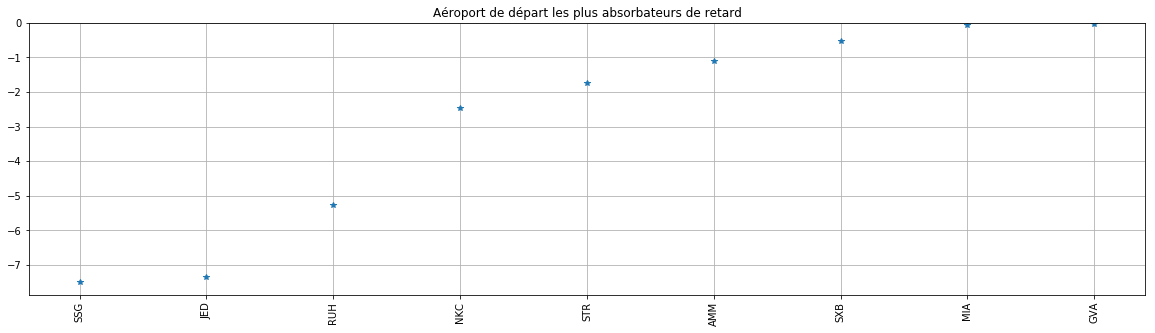

In [15]:
#Les aéroports absorbeurs de retard
Escale_D_min  = Escale_D_moy[Escale_D_moy['Retard_D']<0].sort_values(by=['Retard_D'])

fig = plt.figure()
plt.subplots(figsize=(20, 5))
plt.plot(Escale_D_min,"*")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.ylim(top=0)
plt.title("Aéroport de départ les plus absorbateurs de retard")
plt.show()

#### Commentaire
Graphe inverses: aéroports absorbateur de retard. 
- A alterner avec les aéroports générateurs de retard pour obtenir un retard minimum en fin de journée sur le chaînage avion.

## On s'intéresse désormais aux chaînages et non plus aux vols de manière indépendantes.

In [16]:
#Trouver les chainages en identifiant l'heure d'arrivée de dernier vol de chaque chainage
HA_chainage = vols_MC.groupby(['Date départ réalisée TU','Immatriculation'])[['Heure arrivée réalisée TU']].max().unstack('Immatriculation')
HA_chainage_mat = HA_chainage.values
HA_chainage.head()

Heure arrivée réalisée TU                              \
Immatriculation                             FGFKA  FGFKB  FGFKD  FGFKE  FGFKH   
Date départ réalisée TU                                                         
2009/07/01                                  20:21    NaN  20:35  20:14  21:55   
2009/07/02                                  19:57  23:38  21:41  21:26  21:52   
2009/07/03                                  20:45  20:12  18:42  18:46  18:14   
2009/07/04                                  20:48  20:35  19:44  18:24  18:23   
2009/07/05                                  18:53  07:10  20:40  19:35  19:32   

                                                            ...           \
Immatriculation          FGFKI  FGFKJ  FGFKK  FGFKL  FGFKM  ...    FGUGI   
Date départ réalisée TU                                     ...            
2009/07/01               19:02  20:24  20:25  20:46    NaN  ...    20:17   
2009/07/02               21:40  18:29  21:41  21:07    NaN  ...    22:03   
2009/07/03               19:54  19:23  22:22  20:37  20:26  ...    19:41   
2009/07/04               16:13  19:28  12:40  20:11  21:01  ...    20:27   
2009/07/05               18:15  18:04  20:19    NaN  17:18  ...    19:21   

                                                                          \
Immatriculation          FGUGJ  FGUGK  FGUGL  FGUGM  FGUGN  FGUGO  FGUGP   
Date départ réalisée TU                                                    
2009/07/01               19:50  19:13  20:47  19:41  22:25  18:36  20:34   
2009/07/02               20:31  19:27  19:49  23:32  20:10  21:15  21:44   
2009/07/03               21:26  20:00  19:55  23:07  17:37  20:36  20:48   
2009/07/04               19:58  19:01  19:17  14:39  20:08  17:51  19:26   
2009/07/05               18:01  20:46  19:59  19:45  20:03  22:22  19:31   

                                       
Immatriculation          FGUGQ  FGUGR  
Date départ réalisée TU                
2009/07/01               19:35  19:58  
2009/07/02               21:58  23:18  
2009/07/03               21:06  21:23  
2009/07/04               19:37  18:12  
2009/07/05               14:51  20:31  

[5 rows x 149 columns]

In [17]:
#Liste des immatriculations
listColNames=np.asarray(list(HA_chainage.columns)).T
listColNames=listColNames[1]

#Liste des dates de départ
listLigNames=np.asarray(list(HA_chainage.index))

In [18]:
#Classer dans une matrice le numéro de ligne dans la BDD de dernier vol de chaque chainage

Dernier_vol_chainage = np.array([[0 for i in range(len(listColNames))] for j in range(len(listLigNames))])
for i in range(len(listColNames)):
    vols_imm = vols_MC[vols_MC['Immatriculation']==listColNames[i]]
    
    for j in range(len(listLigNames)):
        if type(HA_chainage_mat[j,i]) == float:
            if isnan(float(HA_chainage_mat[j,i])):
                #Pas d'information sur l'heure d'arrivée de l'avion : on choisit une valeur négative afin de pouvoir l'éliminer
                Dernier_vol_chainage[j,i] = -1 
                
        else:

            vols_date = vols_imm[vols_imm['Date arrivée réalisée TU']==listLigNames[j]]
            vols_heure = vols_date[vols_date['Heure arrivée réalisée TU']==HA_chainage_mat[j,i]]
            if len(vols_heure) == 0:
                #L'avion n'a pas voler le jour j : on choisit une valeur négative afin de pouvoir l'éliminer
                Dernier_vol_chainage[j,i] = -2
            else:
                Dernier_vol_chainage[j,i] = vols_heure.index[0]


                

In [27]:
#Construire une Dataframe contenant tous les chainages valides avec les informations correspondantes

Variables =['N° Ligne dernier vol de chainage','Identifiant dernier vol','Immatriculation','Date arrivée réalisée TU'
            ,'Retard_A dernier vol','Type avion réalisé']

Chainage_valide=[]
for i in range(len(listLigNames)):
    for j in range(len(listColNames)):
        if Dernier_vol_chainage[i,j]>= 0:
            Chainage_valide.append(Dernier_vol_chainage[i,j])

List1=[]
List2=[]
List3=[]
List4=[]
List5=[]
for i in range(len(Chainage_valide)):
    List1.append(vols.iloc[Chainage_valide[i],:]['Identifiant vol'])
    List2.append(vols.iloc[Chainage_valide[i],:]['Immatriculation'])
    List3.append(vols.iloc[Chainage_valide[i],:]['Date arrivée réalisée TU'])
    List4.append(vols.iloc[Chainage_valide[i],:]['Retard_A'])
    List5.append(vols.iloc[Chainage_valide[i],:]['Type avion réalisé'])

Chainage_var = pandas.DataFrame({Variables[0]: Chainage_valide, Variables[1]: List1, 
                                 Variables[2]: List2, Variables[3]: List3, Variables[4]: List4, Variables[5]: List5})

print(Chainage_var)

      N° Ligne dernier vol de chainage Identifiant dernier vol  \
0                                 1069      AF 1006 2009/07/01   
1                                 1107      AF 7684 2009/07/01   
2                                 1388      AF 2300 2009/07/01   
3                                  152      AF 1684 2009/07/01   
4                                  381      AF 1905 2009/07/01   
5                                 1233      AF 1881 2009/07/01   
6                                  894      AF 2049 2009/07/01   
7                                 1562      AF 1262 2009/07/01   
8                                 1376      AF 1250 2009/07/01   
9                                  808      AF 2063 2009/07/01   
10                                1115      AF 1468 2009/07/01   
11                                 601      AF 1094 2009/07/01   
12                                 595      AF 2385 2009/07/01   
13                                1051      AF 1621 2009/07/01   
14        

<Figure size 432x288 with 0 Axes>

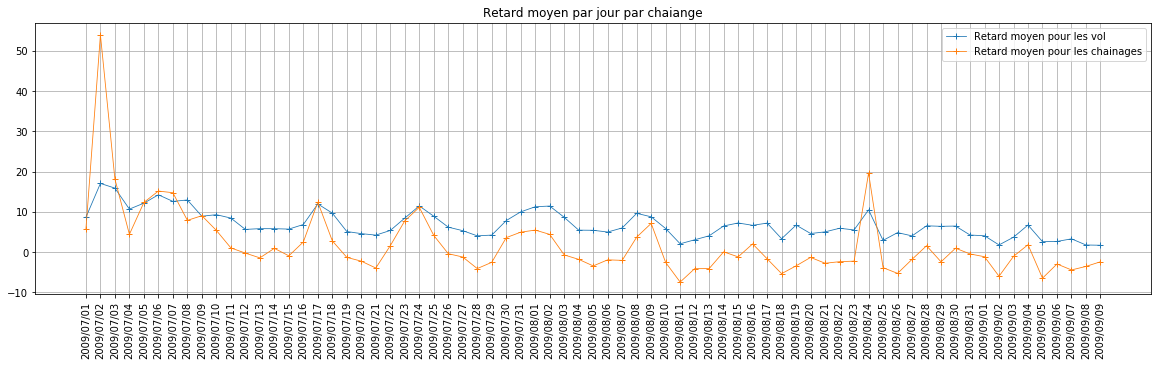

In [20]:
# Courbe retard moyen par jour
fig = plt.figure()

plt.subplots(figsize=(20, 5))
plt.plot(vols_MC.groupby(['Date départ réalisée TU'])[['Retard_D']].mean(),linewidth=0.8, marker="+",label="Retard moyen pour les vol")
plt.plot(Chainage_var.groupby(['Date arrivée réalisée TU'])[['Retard_A dernier vol']].mean(),linewidth=0.8, marker="+",label="Retard moyen pour les chainages")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.legend()
plt.title("Retard moyen par jour par chaiange")
plt.show()

#### Commentaire
On constate que si le retard moyen des vols est élevé, le retard moyen des chainages explose. Au contraire, si le retard moyen des vols est faible ( < 10 min), le retard moyen des chainages est très faible et même inférieur à 0 ! (En moyenne, le dernier vol est en avance). C'est-à-dire que le chainage a permis, dans la plupart des cas, d'absorber les retards des vols au cours de la journée.

À partir des graphes, on peut conclure que si le retard moyen de la journée s'approche de 10 minutes, les chainages n'arrivent plus, dans la plupart des cas, à absorber les retards. Par conséquent, les avions vont accumuler beaucoup de retard à la fin de la journée.

In [21]:
# Création d'un dictionnaire recensant la capacité des avions moyen courrier AF

dico_capacite_avion = {}

dico_capacite_avion["A318"] = 131
dico_capacite_avion["A319"] = 143
dico_capacite_avion["A320"] = 165
dico_capacite_avion["A321"] = 212


print(dico_capacite_avion)

{'A318': 131, 'A319': 143, 'A320': 165, 'A321': 212}


In [22]:
# Fonction destinée au calcul des load factors définis comme le taux de remplissage de l'avion

def load_factor_calculation(nbr_passagers, type_avion):
    return(float(nbr_passagers)/(float(dico_capacite_avion[type_avion])))
    

In [23]:
# Un exemple
type_A = "A321"
passagers = 106
print(load_factor_calculation(passagers, type_A))

0.5


## MODELES ANOVA

# Variable qualitative : type d'avion, variable quantitative : retard

In [24]:
# Extraction des différentes modalités quantitatives de la variable qualitative
chainage_intermediaire = Chainage_var[Chainage_var.columns[4:6]]

retard_318 = chainage_intermediaire[chainage_intermediaire[chainage_intermediaire[chainage_intermediaire.columns[1]]=='318'].columns[0]]
retard_319 = chainage_intermediaire[chainage_intermediaire[chainage_intermediaire[chainage_intermediaire.columns[1]]=='319'].columns[0]]
retard_320 = chainage_intermediaire[chainage_intermediaire[chainage_intermediaire[chainage_intermediaire.columns[1]]=='320'].columns[0]]
retard_321 = chainage_intermediaire[chainage_intermediaire[chainage_intermediaire[chainage_intermediaire.columns[1]]=='321'].columns[0]]

print(len(retard_321),len(retard_320),len(retard_319),len(retard_318))

9813 9813 9813 9813


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [26]:
stats.f_oneway(retard_318, retard_319, retard_320, retard_321)

F_onewayResult(statistic=0.0, pvalue=1.0)

Interprétation : Il n'y a pas d'effet de facteur "avion" notable.